In [1]:
import os
import sys
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

#print(os.path.realpath(__file__))
#print(os.path.dirname(os.path.realpath(__file__)))
print(os.path.realpath('..'))

sys.path.append('..')
from src.utils.functions import import_data

C:\Users\Daniel Guzmán\Documents\Proyectos\finapp


Different ways to access Dir
- `os.path.realpath(__file__)`
- `os.path.abspath('')`
- `os.path.dirname(os.path.realpath(__file__))`
- `os.path.realpath('./')`

In [2]:
TOKEN = os.environ.get('NOTION_TOKEN')
DATABASE_ID = os.environ.get('DATABASE_ID')

In [27]:
# import the data to a dataframe
data = import_data().dropna()
data['Date'] = data['Date'].astype('datetime64[ns]')
income = data[data['Category'] == 'Income']
expences = data[data['Category'] != 'Income']
expences['Month'] = expences['Date'].dt.strftime('%b')

C:\Users\Daniel Guzmán\AppData\Local\Temp\ipykernel_12920\2002365913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expences['Month'] = expences['Date'].dt.strftime('%b')


In [4]:
all_cat = list(expences['Category'].unique())
options = expences['Category'].unique()
np.append(options, all_cat)

array(['Food', 'Fast food', 'Bills & Utilities', 'Transport', 'Loan',
       'Entertainments', 'Shopping', 'Health & Wellness', 'Extra', 'Food',
       'Fast food', 'Bills & Utilities', 'Transport', 'Loan',
       'Entertainments', 'Shopping', 'Health & Wellness', 'Extra'],
      dtype=object)

In [14]:
df_grouped = df.groupby('Category')['Amount'].sum().reset_index()
fig = px.pie(df_grouped, values='Amount', names='Category', title='Montos por Categoría')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title=dict(font=dict(size=20)),

                #paper_bgcolor='rgba(0,0,0,0)',
                #plot_bgcolor='rgba(0,0,0,0)'
                  )
fig.update_xaxes(
    showline=True,mirror=True,linecolor='black',
    nticks=10,ticks="inside",
    title_font = {"size": 15},
    showgrid=True,range=[0,22],
    title_standoff = 20
    )

fig.update_yaxes(
    showline=True,mirror=True,linecolor='black',
    nticks=10,ticks="inside",tickprefix="$",
    title_font = {"size": 15},range=[0,1100],
    title_standoff = 20)

fig.update_layout(showlegend=True,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="left",
                      x=0.15,
                      bordercolor="Black",
                      borderwidth=1)
                 )

fig.write_image('/home/daniel/Proyectos_Daniel/finapp/data/images/pie_px.png', format='png')
fig.show()

In [9]:
df_grouped

,Category,Amount
0,Bills & Utilities,2777191.0
1,Entertainments,567000.0
2,Extra,342500.0
3,Fast food,636536.0
4,Food,488733.0
5,Health & Wellness,14300.0
6,Shopping,171712.0
7,Transport,116800.0


In [10]:
df.query('Category == ""')

,Date,Name,Category,Amount,Pay_Method


## Heatmap to display time series data

In [72]:
import seaborn as sns
from matplotlib.colors import BoundaryNorm, ListedColormap
import plotly.graph_objects as go

In [28]:
expences = expences[expences['Date'].dt.month == 3]
expences.head(2)

,Date,Name,Category,Amount,PayMethod,Month
11,2024-03-30,Perritos y cocacola,Fast food,38000,Efectivo,Mar
12,2024-03-31,Compra minimercado,Fast food,13100,Efectivo,Mar


In [120]:
expences.loc[:, 'Day'] = expences['Date'].dt.day
timeline_data = expences[['Day', 'Category', 'Amount']]
pivoted_data = pd.pivot_table(timeline_data,
                              values='Amount',
                              index='Category',
                              columns='Day')

# Completing missing days (no expeses registered) with NaN
days_month = np.arange(1, expences['Date'].dt.days_in_month.iloc[0]+1)
missing_days = [day for day in days_month if day not in pivoted_data.columns]

for day in missing_days:
    pivoted_data[day] = pd.Series(dtype='int')

pivoted_data = pivoted_data.reindex(sorted(pivoted_data.columns), axis=1)

In [68]:
heatmap_colors = ['#a0e0d9', '#72b1aa', '#46847e', '#165954', '#00322e']
# heatmap_colors = ['#a0e0d9', '#f9d38b', '#d1ac4f', '#f99893', '#ef516b']
my_cmap = ListedColormap(heatmap_colors)
limits = [0, 50000, 100000, 200000, 500000, 50e6]
my_norm = BoundaryNorm(limits, ncolors=len(heatmap_colors))

<Axes: xlabel='Day', ylabel='Category'>

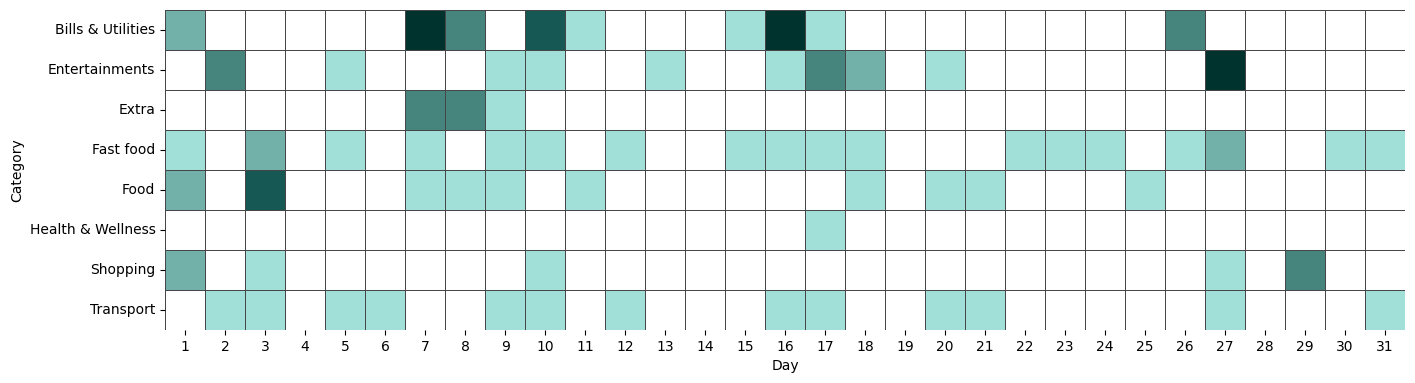

In [123]:
plt.figure(figsize=(16,6))
sns.heatmap(pivoted_data,
            linewidths=0.5,
            cmap=my_cmap,
            norm=my_norm,
            cbar=False,
            linecolor='#464646',
            square=True)

In [124]:
fig = go.Figure(data=go.Heatmap(z = timeline_data['Amount'],
                                x = timeline_data['Day'],
                                y = timeline_data['Category'],
                                colorscale=heatmap_colors))
fig.show()

In [139]:
fig = px.imshow(pivoted_data,
                color_continuous_scale=heatmap_colors,
                aspect='equal')
fig.show()

In [148]:
cell_size = 35
row_title_width = 200
width = cell_size*len(pivoted_data.columns)
height = cell_size*len(pivoted_data.index)

fig = px.imshow(pivoted_data, color_continuous_scale=heatmap_colors)

for i in range(len(pivoted_data.columns)):
    fig.add_shape(type="line", x0=0.5 + i, y0=-0.5, x1=0.5 + i, y1=len(pivoted_data.index) - 0.5, line=dict(color="white", width=2))

for i in range(len(pivoted_data.index)):
    fig.add_shape(type="line", x0=-0.5, y0=0.5 + i, x1=len(pivoted_data.columns) - 0.5, y1=0.5 + i, line=dict(color="white", width=2))

fig.show()